# Creating the cover picture for my blog post on MNIST

When I first published my [blog post on working with the MNIST-dataset](https://chrwittm.github.io/posts/2022-11-26-mnist/), I used this pictures as a cover:

![](https://chrwittm.github.io/posts/2022-11-26-mnist/mnist-3.png)

When scaled-up significantly, it did not look especially great (no surprise). Therefore, I decided to create a better cover picture, not with Photoshop, but with code. This notebook explains how I did it.

In [1]:
from fastai.vision.all import *

## Loading the data

Let's use the MNIST test data to grab some images.

In [2]:
import pandas as pd

test = pd.read_csv("test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def get_test_image(index):
    im = torch.tensor(test.iloc[index])
    image = Image.frombytes('L', (28, 28), bytes(im))
    return image

In [4]:
get_test_image(0)

In [5]:
get_test_image(1)

### Converting image tensor to 2D and back to 1D

From the data above, we can get an image as a tensor in a 1D-representation. Since we usually think of images as 2D, here is how to convert it to 2D and back.

In [6]:
im1 = torch.tensor(test.iloc[0])
print(f'The length of the tensor is {im1.shape}')
im1[:100] # the first 100 pixels

The length of the tensor is torch.Size([784])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])

Now, we convert it into a 28x28 2D-tensor:

In [7]:
im1 = im1.view(28,28)
im1.size()

torch.Size([28, 28])

And now, we bring it back to 1D:

In [8]:
im1 = im1.view(784)
print(f'The length of the tensor is {im1.shape}')
im1[:100] # the first 100 pixels

The length of the tensor is torch.Size([784])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])

### Getting an image as 2D tensor

Let's wrap this in a function to get images as 2D tensors:

In [9]:
def get_image_as_2d_tensor(index):
    im = torch.tensor(test.iloc[index])
    return im.view(28,28)

In [10]:
im1 = get_image_as_2d_tensor(0)
im2 = get_image_as_2d_tensor(1)
im3 = get_image_as_2d_tensor(2)
im3.size()

torch.Size([28, 28])

### Concatenating the images

To create a new picture, which contains more than one digit, let's call it concatenating, we will do the following:

* iterate over the lines of each image
* concatenating them together so that the block come from alternating images
* once flattened and put into a new shape, the new image should appear

In [11]:
def concat_images(im1,im2):
    im3 =  [torch.cat((t1,t2)) for (t1,t2) in zip(im1,im2)]
    return torch.stack((im3)) #https://stackoverflow.com/questions/61359162/convert-a-list-of-tensors-to-tensors-of-tensors-pytorch

In [12]:
final = concat_images(im1,im2)
final.size()

torch.Size([28, 56])

In [13]:
final = concat_images(final,im3)
final.size()

torch.Size([28, 84])

In [14]:
final = final.view(784*3)

In [15]:
final = Image.frombytes('L', (3*28, 28), bytes(final))#.convert('RGB')

In [16]:
final

### Creating an image with NxN digits

Let's wrap everything we did so far in a function. To additionally add more lines, the flattened tensors of the images just need to be concatenated and put into a new shape:

In [17]:
columns = 8
lines = 8

In [18]:
def create_line_of_images(start, noi):

    im = get_image_as_2d_tensor(start)

    for i in range(1,noi):
        im2 = get_image_as_2d_tensor(start+i)
        im = concat_images(im,im2)
    
    return im.view(784*noi)

im = create_line_of_images(0, columns)
im = Image.frombytes('L', (columns*28, 28), bytes(im))
im

In [19]:
im = create_line_of_images(0, columns)

for i in range(1,lines):
    line = create_line_of_images(lines*i, columns)
    im = torch.cat((im, line))

im.view(784*columns*lines)
im = Image.frombytes('L', (columns*28, lines*28), bytes(im))

In [20]:
#uncomment to download
#im.save('mnist-digits.png')

Volià, here is the final result:

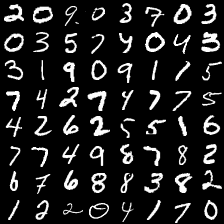

In [21]:
im